In [9]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import pandas as pd
%matplotlib inline

In [10]:
def read_dataset(filePath,delimiter=','):
    return pd.read_csv(filePath)

def append_bias_reshape(features,labels):
    n_training_samples = features.shape[0]
    n_dim = features.shape[1]
    f = np.reshape(np.c_[np.ones(n_training_samples),features],[n_training_samples,n_dim + 1])
    l = np.asarray(labels)
    return f, l

In [14]:
data = read_dataset('iris.csv')
features = data.ix[:,:-1]
labels = pd.get_dummies(data.ix[:,-1])

f, l = append_bias_reshape(features,labels)
n_dim = f.shape[1]

rnd_indices = np.random.rand(len(f)) < 0.75

train_x = f[rnd_indices]
train_y = l[rnd_indices]
test_x = f[~rnd_indices]
test_y = l[~rnd_indices]

In [15]:
learning_rate = 0.01
training_epochs = 1000

X = tf.placeholder(tf.float32,[None,n_dim])
Y = tf.placeholder(tf.float32,[None,3])
W = tf.Variable(tf.ones([n_dim,3]))

init = tf.initialize_all_variables()

Instructions for updating:
Use `tf.global_variables_initializer` instead.


In [16]:
y_ = tf.nn.softmax(tf.matmul(X,W))
cost_function = tf.reduce_mean(tf.reduce_sum((-Y * tf.log(y_)) - ((1 - Y) * tf.log(1 - y_)), reduction_indices=[1]))
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost_function)

0.921053
[ 0.01        1.87264752  1.84867132 ...,  0.52575845  0.52548873
  0.52521932]


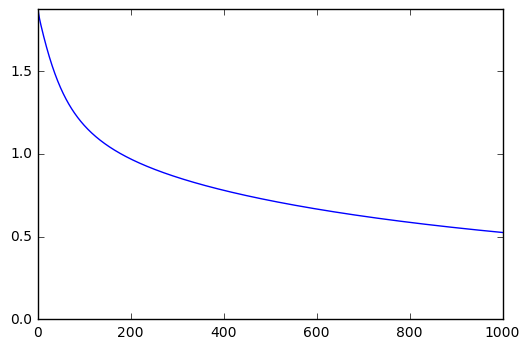

In [8]:
cost_history = np.empty(shape=[1],dtype=float)

with tf.Session() as sess:
    sess.run(init)
    for epoch in range(training_epochs):
        sess.run(optimizer,feed_dict={X:train_x,Y:train_y})
        cost_history = np.append(cost_history,sess.run(cost_function,feed_dict={X: train_x,Y: train_y}))
    
    y_pred = sess.run(y_ , feed_dict={X: test_x})
    correct_prediction = tf.equal(tf.argmax(y_,1), tf.argmax(Y,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    print(sess.run(accuracy, feed_dict={X: test_x, Y: test_y}))
    
    #plot cost
    print(cost_history)
    plt.plot(cost_history)
    plt.axis([0,training_epochs,0,np.max(cost_history)])
    plt.show()